<a href="https://colab.research.google.com/github/avantipova/ml2022/blob/main/ridge_regression_%2B_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Гребневая регрессия


Accuracy 0.7738597970112534


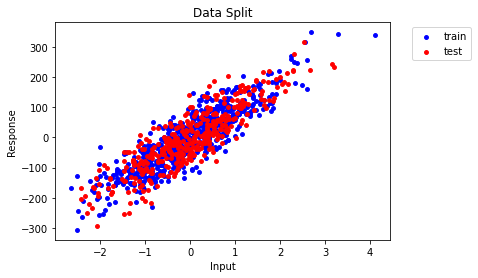

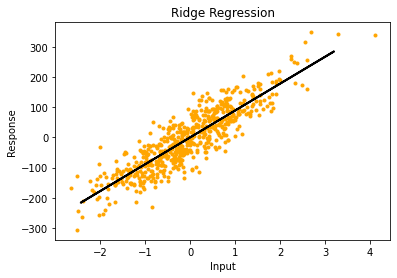

R_squared = 0.7738597970112534
Coefficients (actual, after ridge regression):
91.50484707247769 [89.02023428]


In [41]:
# импорт библиотек
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy import arange
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold

# генерируем данные для x и y
X, y, coef = datasets.make_regression(
    n_samples=1000, 
    n_features=1, 
    n_informative=1, 
    noise=50,
    coef=True, 
    random_state=2)

# стандартизация данных
ss = StandardScaler()
ss.fit(X)
ss.transform(X)

# разделение данных на train и test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=2)

# Выбор наилучшего параметра alpha
# Загрузить библиотеку
from sklearn.linear_model import RidgeCV
# Создать объект гребневой регрессии
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regr_cv = RidgeCV(alphas=arange(0, 10, 0.1), cv=cv, scoring='neg_mean_absolute_error')
# Выполнить подгонку линейной регрессии
model_cv = regr_cv.fit(train_X, train_y)

# alpha — величина регуляризации
ridge_regression = Ridge(model_cv.alpha_)

# обучение
ridge_regression.fit(train_X, train_y)

# предсказание результата
predictions = ridge_regression.predict(test_X)

# вывод точности предсказания
print("Accuracy", ridge_regression.score(test_X, test_y))

# график
plt.scatter(train_X,train_y,c="b",label="train",s=15)
plt.scatter(test_X,test_y,c="r",label="test",s=15)
plt.xlabel("Input")
plt.ylabel("Response")
plt.title('Data Split')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# график ЛР
plt.scatter(train_X,train_y, color="orange", marker=".")
plt.plot(test_X, predictions, color="black", linewidth=2)
plt.xlabel("Input")
plt.ylabel("Response")
plt.title('Ridge Regression')
plt.show()

# результаты
print("R_squared =", ridge_regression.score(test_X, test_y))
print("Coefficients (actual, after ridge regression):")
print(coef, ridge_regression.coef_)

## Логистическая регрессия 

Accuracy 0.9473684210526315


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


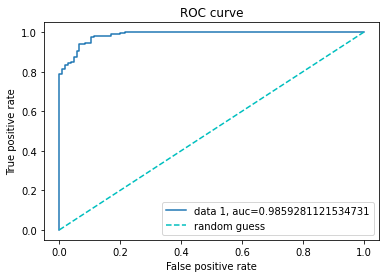

In [42]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

# загружаем датасет
cancer = load_breast_cancer()

# присваиваем данные для X и y
X = cancer.data
y = cancer.target
 
# стандартизация данных
ss = StandardScaler()
ss.fit(X)
ss.transform(X)

# разделение данных на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

# создаем объект логистической регрессии
clf = LogisticRegression(penalty='l2', C=0.1)

# обучение
clf.fit(X_train, y_train)

# предсказание результата
y_pred = clf.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = clf.predict_proba(X_test)[::,1]

# построение ROC кривой (оценка качества бинарной классификации)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(fpr,fpr + 0, '--c', label="random guess")
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC curve')
plt.show()
